https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html
https://stackoverflow.com/questions/37039224/attributeerror-module-object-has-no-attribute-xfeatures2d-python-opencv-2

In [11]:
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 47.9MB 304kB/s eta 0:00:01    |█▍                              | 2.1MB 1.0MB/s eta 0:00:45     |████████████████████████        | 36.1MB 2.3MB/s eta 0:00:06
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import cv2
import skimage
import matplotlib.pyplot as plt

from skimage.transform import resize

In [2]:
img1 = cv2.imread('datasets/images/taj_small.jpg')

In [3]:
img1.shape

(540, 999, 3)

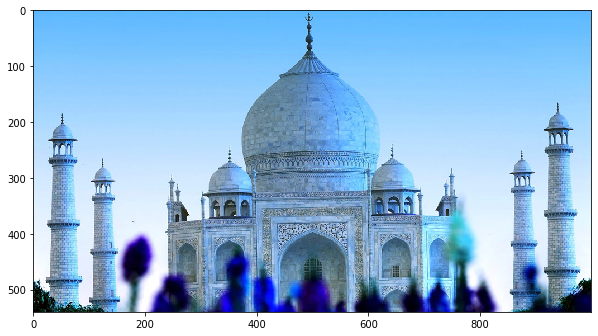

In [4]:
plt.figure(figsize=(10, 10))  

plt.imshow(img1);

### Generating SIFT features
* Convert the image to greyscale
* kp is the keypoints
* desc is the SIFT descriptors, they're 128-dimensional vectors that we can use for our final features

In [5]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [41]:
sift = cv2.xfeatures2d.SIFT_create()

In [42]:
sift

<xfeatures2d_SIFT 0x1c2cb52d30>

In [46]:
kp1 = sift.detect(gray1, None)

In [47]:
kp1

[<KeyPoint 0x1c2d05ac90>,
 <KeyPoint 0x1c2d05ac30>,
 <KeyPoint 0x1c2d05ab70>,
 <KeyPoint 0x1c2d05ac00>,
 <KeyPoint 0x1c2d05aba0>,
 <KeyPoint 0x1c2d05ac60>,
 <KeyPoint 0x1c2d05aab0>,
 <KeyPoint 0x1c2d05aa50>,
 <KeyPoint 0x1c2d05acf0>,
 <KeyPoint 0x1c2d05ad20>,
 <KeyPoint 0x1c2d05ad50>,
 <KeyPoint 0x1c2d05ad80>,
 <KeyPoint 0x1c2d05adb0>,
 <KeyPoint 0x1c2d05ade0>,
 <KeyPoint 0x1c2d05ae10>,
 <KeyPoint 0x1c2d05ae40>,
 <KeyPoint 0x1c2d05ae70>,
 <KeyPoint 0x1c2d05aea0>,
 <KeyPoint 0x1c2d05aed0>,
 <KeyPoint 0x1c2d05af00>,
 <KeyPoint 0x1c2d05af30>,
 <KeyPoint 0x1c2d05af60>,
 <KeyPoint 0x1c2d05af90>,
 <KeyPoint 0x1c2d05afc0>,
 <KeyPoint 0x1c2d060030>,
 <KeyPoint 0x1c2d060060>,
 <KeyPoint 0x1c2d060090>,
 <KeyPoint 0x1c2d0600c0>,
 <KeyPoint 0x1c2d0600f0>,
 <KeyPoint 0x1c2d060120>,
 <KeyPoint 0x1c2d060150>,
 <KeyPoint 0x1c2d060180>,
 <KeyPoint 0x1c2d0601b0>,
 <KeyPoint 0x1c2d0601e0>,
 <KeyPoint 0x1c2d060210>,
 <KeyPoint 0x1c2d060240>,
 <KeyPoint 0x1c2d060270>,
 <KeyPoint 0x1c2d0602a0>,
 <KeyPoint 0

In [48]:
img1 = cv2.drawKeypoints(gray1, kp1, outImage=None)

In [49]:
cv2.imwrite('sift_keypoints.jpg', img1)

True

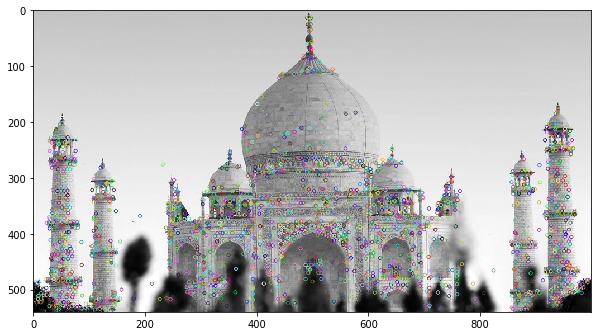

In [40]:
sift_keypoints = skimage.io.imread('sift_keypoints.jpg')

plt.figure(figsize = (10, 10))
plt.imshow(sift_keypoints, cmap = 'gray');

In [12]:
img2 = cv2.drawKeypoints(gray1, kp1, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('rich_sift_keypoints.jpg', img2)

True

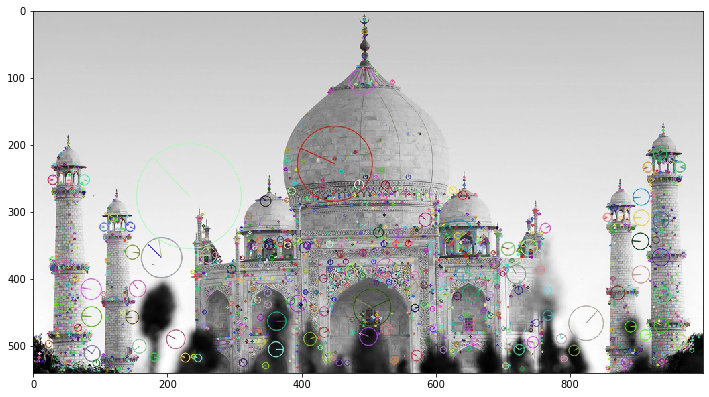

In [13]:
rich_sift_keypoints = skimage.io.imread('rich_sift_keypoints.jpg')

plt.figure(figsize = (12, 20))
plt.imshow(rich_sift_keypoints, cmap = 'gray');

In [14]:
kp1, des1 = sift.compute(gray1, kp1)

In [17]:
des1.shape

(2236, 128)

In [18]:
des1

array([[  7.,  12.,   0., ...,   0.,   4.,  15.],
       [  7.,   1.,   2., ...,   0.,   0.,   1.],
       [  0.,   1.,   4., ..., 102.,  23.,   0.],
       ...,
       [ 27.,  20.,  14., ...,   0.,   1.,   4.],
       [ 25., 115.,  32., ...,   0.,   0.,   0.],
       [  9.,   9.,   7., ...,   0.,   0.,  12.]], dtype=float32)

### visualize how the SIFT features match up each other across two images

In [19]:
img2 = cv2.imread('datasets/images/taj_mahal_india.jpg')

In [20]:
img2.shape

(576, 1024, 3)

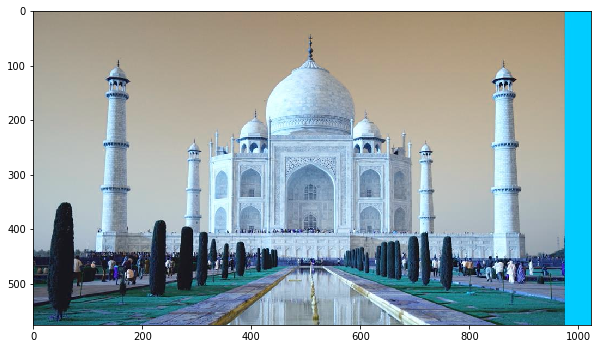

In [21]:
plt.figure(figsize=(10, 10))  

plt.imshow(img2);

In [22]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [23]:
kp2, des2 = sift.detectAndCompute(gray2, None)

In [27]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

matches = bf.match(des1, des2)

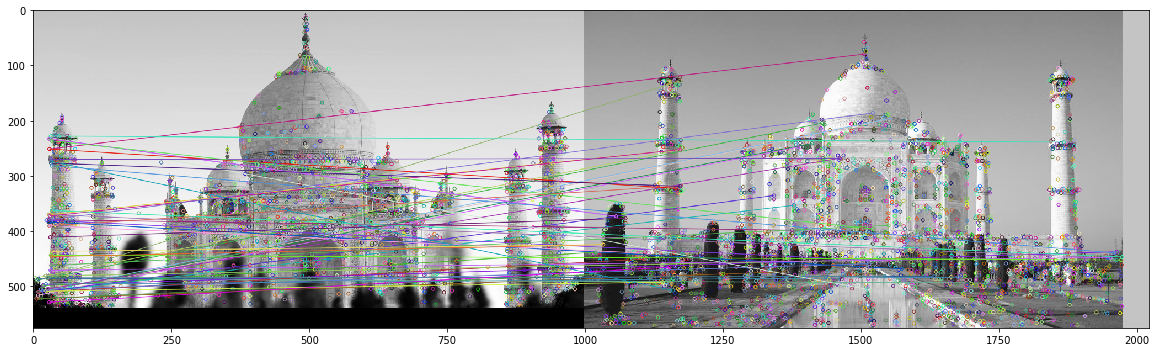

In [28]:
N_MATCHES = 50

match_img = cv2.drawMatches(
    gray1, kp1,
    gray2, kp2,
    matches[:N_MATCHES], gray2.copy(), flags=0)

plt.figure(figsize=(20, 10))
plt.imshow(match_img);